In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.decomposition import PCA

In [2]:
submission_data = pd.read_csv('/Users/user/Desktop/Все Папки/HITs/2nd Grade/ML/dist/module_1_poetry-0.1.0/data/sample_submission.csv')

In [3]:
test_data = pd.read_csv('/Users/user/Desktop/Все Папки/HITs/2nd Grade/ML/dist/module_1_poetry-0.1.0/data/test.csv')

In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
X_final = test_data.drop(['PassengerId', 'Cabin', 'Destination', 'Name'], axis=1)
X_final = pd.get_dummies(X_final)
X_final = X_final.fillna(X_final.median(numeric_only=True))
X_final = X_final.astype(int)
X_final = X_final.drop(['CryoSleep_False', 'VIP_False'], axis=1)

In [6]:
X_final.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,VIP_True
0,27,0,0,0,0,0,1,0,0,1,0
1,19,0,9,0,2823,0,1,0,0,0,0
2,31,0,0,0,0,0,0,1,0,1,0
3,38,0,6652,0,181,585,0,1,0,0,0
4,20,10,0,635,0,0,1,0,0,0,0


In [7]:
X_final.shape

(4277, 11)

In [8]:
train_data = pd.read_csv('/Users/user/Desktop/Все Папки/HITs/2nd Grade/ML/dist/module_1_poetry-0.1.0/data/train.csv')

In [9]:
submission_data.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [10]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
print(
    len(train_data[(train_data['Transported'] == True) & (train_data['VIP'] == True)]), \
    len(train_data[(train_data['Transported'] == True) & (train_data['VIP'] == False)])
)

76 4198


In [12]:
print(len(train_data), len(train_data[train_data['VIP'] == False]))

8693 8291


In [13]:
len(train_data[train_data['VIP'] == True])

199

In [14]:
# ВАЖНЫЕ НАБЛЮДЕНИЯ!!!!!!  XD
# ТЕ, КТО БЫЛ НЕ В VIP, БОЛЬШЕ БЫЛИ ПОДВЕРЖЕНЫ ВОЗДЕЙСТВИЮ АНОМАЛИИ
#

In [15]:
train_data[train_data['Transported'] == True].groupby('HomePlanet', as_index=False).agg({'Transported': 'count'})

,HomePlanet,Transported
0,Earth,1951
1,Europa,1404
2,Mars,920


In [16]:
train_data[train_data['Transported'] == False].groupby('HomePlanet', as_index=False).agg({'Transported': 'count'})

,HomePlanet,Transported
0,Earth,2651
1,Europa,727
2,Mars,839


In [17]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
X = train_data.drop(['PassengerId', 'Cabin', 'Destination', 'Name', 'Transported'], axis=1)

In [19]:
y = train_data['Transported']

In [20]:
X = pd.get_dummies(X)

In [21]:
X = X.fillna(X.median(numeric_only=True))
X = X.astype(int)

In [22]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,39,0,0,0,0,0,0,1,0,1,0,1,0
1,24,109,9,25,549,44,1,0,0,1,0,1,0
2,58,43,3576,0,6715,49,0,1,0,1,0,0,1
3,33,0,1283,371,3329,193,0,1,0,1,0,1,0
4,16,303,70,151,565,2,1,0,0,1,0,1,0


In [23]:
X = X.drop(['CryoSleep_False', 'VIP_False'], axis=1)

In [24]:
X.shape

(8693, 11)

In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

np.float64(0.7635679837175346)

In [28]:
clf = tree.DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [29]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}

In [30]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [31]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [32]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [33]:
best_clf = grid_search_cv_clf.best_estimator_

In [34]:
best_clf.score(X_test, y_test)

0.7608922969675845

In [35]:
y_true, y_pred = y_test, best_clf.predict(X_test) 

In [36]:
precision_score(y_true, y_pred)

0.7048030221262817

In [37]:
recall_score(y_true, y_pred)

0.9038062283737024

In [38]:
accuracy_score(y_true, y_pred)

0.7608922969675845

In [39]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [40]:
y_predicted_prob

array([[0.84011628, 0.15988372],
       [0.46891192, 0.53108808],
       [0.25      , 0.75      ],
       ...,
       [0.91646192, 0.08353808],
       [0.84011628, 0.15988372],
       [0.02016129, 0.97983871]], shape=(2869, 2))

<Axes: >

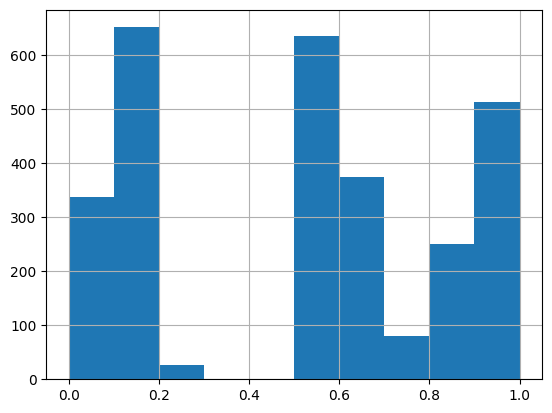

In [41]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [135]:
y_pred_adjusted = np.where(y_predicted_prob[:, 1] > 0.44, 1, 0)

In [136]:
accuracy_score(y_true, y_pred_adjusted)

0.7608922969675845

In [137]:
recall_score(y_true, y_pred_adjusted)

0.9038062283737024

In [138]:
precision_score(y_true, y_pred_adjusted)

0.7048030221262817

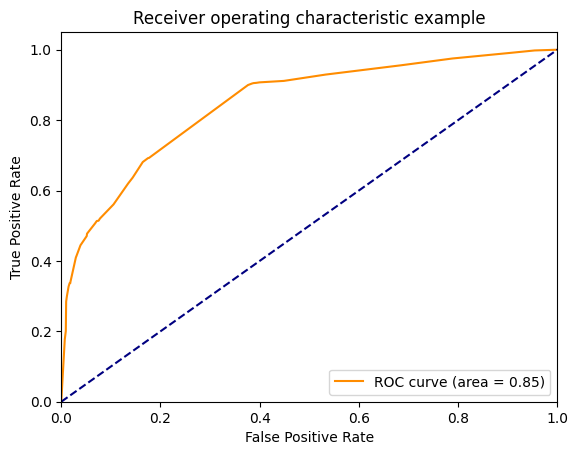

In [44]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
clf_rf = RandomForestClassifier()

In [46]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [3, 5, 7, 10], 'min_samples_leaf': [10, 20, 30, 40, 50], 'min_samples_split': [3, 5, 7, 10]}

In [47]:
grid_search_cv_rf_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [48]:
grid_search_cv_rf_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'min_samples_split': [3, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [49]:
best_rf_clf = grid_search_cv_rf_clf.best_estimator_

In [50]:
y_pred2 = best_rf_clf.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred2)

0.7807598466364587

In [52]:
precision_score(y_true, y_pred2)

0.7628865979381443

In [53]:
recall_score(y_true, y_pred2)

0.8193771626297578

In [54]:
y_pred2

array([False,  True,  True, ..., False, False,  True], shape=(2869,))

In [55]:
y_pred

array([False,  True,  True, ..., False, False,  True], shape=(2869,))

In [56]:
best_rf_clf.score(X_test, y_test)

0.7807598466364587

In [57]:
feature_importances = best_rf_clf.feature_importances_

In [58]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})

In [59]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
9,CryoSleep_True,0.247515
4,Spa,0.151872
2,FoodCourt,0.132043
1,RoomService,0.114206
5,VRDeck,0.108355
3,ShoppingMall,0.083688
0,Age,0.069493
6,HomePlanet_Earth,0.047125
7,HomePlanet_Europa,0.035151
8,HomePlanet_Mars,0.010272


In [58]:
# ALL DATASET TEST
# ALL DATASET TEST
# ALL DATASET TEST
# ALL DATASET TEST
# ALL DATASET TEST

In [140]:
y_pred_all = best_rf_clf.predict(X_final)

In [141]:
y_pred_all

array([ True, False,  True, ...,  True,  True,  True], shape=(4277,))

In [ ]:
final_prediction_df = pd.DataFrame(data={'PassengerId': test_data.PassengerId, 'Transported': y_pred_all})

In [ ]:
final_prediction_df.to_csv('/Users/user/Desktop/Все Папки/HITs/2nd Grade/ML/dist/module_1_poetry-0.1.0/results_data/prediction.csv', index=False)

In [ ]:
final_prediction_df.shape